In [10]:
import pandas as pd
import tensorflow as tf

In [2]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
diabetes.head()

Number_pregnant  Glucose_concentration  Blood_pressure   Triceps   Insulin  \
0                6               0.743719        0.590164  0.353535  0.000000   
1                1               0.427136        0.540984  0.292929  0.000000   
2                8               0.919598        0.524590  0.000000  0.000000   
3                1               0.447236        0.540984  0.232323  0.111111   
4                0               0.688442        0.327869  0.353535  0.198582   

        BMI  Pedigree  Age  Class Group  
0  0.500745  0.234415   50      1     B  
1  0.396423  0.116567   31      0     C  
2  0.347243  0.253629   32      1     B  
3  0.418778  0.038002   21      0     B  
4  0.642325  0.943638   33      1     C

In [5]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [6]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

### Normalize columns

In [7]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: x- x.min() / (x.max() - x.min()))

In [8]:
diabetes.head()

Number_pregnant  Glucose_concentration  Blood_pressure   Triceps   Insulin  \
0              6.0               0.743719        0.590164  0.353535  0.000000   
1              1.0               0.427136        0.540984  0.292929  0.000000   
2              8.0               0.919598        0.524590  0.000000  0.000000   
3              1.0               0.447236        0.540984  0.232323  0.111111   
4              0.0               0.688442        0.327869  0.353535  0.198582   

        BMI  Pedigree  Age  Class Group  
0  0.500745  0.234415   50      1     B  
1  0.396423  0.116567   31      0     C  
2  0.347243  0.253629   32      1     B  
3  0.418778  0.038002   21      0     B  
4  0.642325  0.943638   33      1     C

### Continuous Features

In [11]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

### Categorical Features
If you know the set of all possible feature values of a column and there are only a few of them, you can use categorical_column_with_vocabulary_list. If you don't know the set of possible values in advance you can use categorical_column_with_hash_bucket

In [13]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A', 'B', 'C', 'D'])

In [14]:
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size = 10)

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

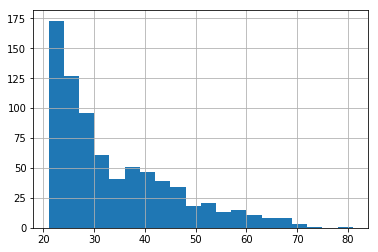

In [16]:
diabetes['Age'].hist(bins = 20)

### We can bucket the continuous values into categories

In [17]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries = [20,30,40,50,60,70,80]) #
# boundaries are the buckets

In [18]:
all_features = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, assigned_group, age_bucket]

### Train Test Split

In [20]:
x_data = diabetes.drop('Class', axis = 1)

In [26]:
x_data.head()

Number_pregnant  Glucose_concentration  Blood_pressure   Triceps   Insulin  \
0              6.0               0.743719        0.590164  0.353535  0.000000   
1              1.0               0.427136        0.540984  0.292929  0.000000   
2              8.0               0.919598        0.524590  0.000000  0.000000   
3              1.0               0.447236        0.540984  0.232323  0.111111   
4              0.0               0.688442        0.327869  0.353535  0.198582   

        BMI  Pedigree  Age Group  
0  0.500745  0.234415   50     B  
1  0.396423  0.116567   31     C  
2  0.347243  0.253629   32     B  
3  0.418778  0.038002   21     B  
4  0.642325  0.943638   33     C

In [22]:
y_data = diabetes['Class']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = 42)

## Input function

In [27]:
input_func = tf.estimator.inputs.pandas_input_fn(x = X_train, y = y_train, num_epochs = 1000, shuffle = True)

In [29]:
model = tf.estimator.LinearClassifier(feature_columns = all_features, n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\LENOVO\\AppData\\Local\\Temp\\tmp75ajceu1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000017307BA20F0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [30]:
model.train(input_fn = input_func, steps = 1000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\LENOVO\AppData\Local\Temp\tmp75ajceu1\model.ckpt.
INFO:tensorflow:loss = 88.7229, step = 1
INFO:tensorflow:global_step/sec: 86.886
INFO:tensorflow:loss = 78.043, step = 101 (1.147 sec)
INFO:tensorflow:global_step/sec: 165.59
INFO:tensorflow:loss = 64.227, step = 201 (0.603 sec)
INFO:tensorflow:global_step/sec: 148.533
INFO:tensorflow:loss = 71.3373, step = 301 (0.673 sec)
INFO:tensorflow:global_step/sec: 161.727
INFO:tensorflow:loss = 70.8699, step = 401 

In [31]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, y = y_test, batch_size = 10, num_epochs = 1, shuffle = True)

In [33]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-07-02-06:54:14
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\LENOVO\AppData\Local\Temp\tmp75ajceu1\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-07-02-06:54:17
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.766234, accuracy_baseline = 0.65368, auc = 0.79731, auc_precision_recall = 0.653031, average_loss = 0.51636, global_step = 1000, label/mean = 0.34632, loss = 4.96997, precision = 0.685714, prediction/mean = 0.358987, recall = 0.6
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\LENOVO\AppData\Local\Temp\tmp75ajceu1\model.ckpt-1000


In [34]:
results

{'accuracy': 0.76623374,
 'accuracy_baseline': 0.65367961,
 'auc': 0.79730964,
 'auc_precision_recall': 0.65303099,
 'average_loss': 0.5163601,
 'label/mean': 0.34632036,
 'loss': 4.9699659,
 'precision': 0.6857143,
 'prediction/mean': 0.35898694,
 'recall': 0.60000002,
 'global_step': 1000}

In [35]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, batch_size = 10, num_epochs = 1, shuffle = False)

In [36]:
predictions = model.predict(pred_input_func)

In [37]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\LENOVO\AppData\Local\Temp\tmp75ajceu1\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [38]:
my_pred

[{'logits': array([ 0.02522659], dtype=float32),
  'logistic': array([ 0.50630629], dtype=float32),
  'probabilities': array([ 0.49369368,  0.50630629], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-1.74430108], dtype=float32),
  'logistic': array([ 0.14876744], dtype=float32),
  'probabilities': array([ 0.85123253,  0.14876743], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.5997895], dtype=float32),
  'logistic': array([ 0.16801102], dtype=float32),
  'probabilities': array([ 0.83198899,  0.16801104], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.64943767], dtype=float32),
  'logistic': array([ 0.34311625], dtype=float32),
  'probabilities': array([ 0.65688378,  0.34311628], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=obj